# First Analysis GTB & US Stock Market
In this first analysis we will check if there are any patterns to be found based on the 
terroristic attacks including US casulties based on the most important US Stock Indexes 

### Importing the cleaned data 

In [89]:
# Import libraries needed for analysis
import pandas as pd
from matplotlib import pyplot, dates
import seaborn as sns
import plotly.express as px 
%matplotlib inline

In [90]:
# Read in cleaned datafiles from the terrorism database
us_casulties = pd.read_csv('us_casulties_clean.csv')
global_events_us = pd.read_csv('global_events_us.csv')
global_events = pd.read_csv('global_events.csv')

# Read in the cleaned datafiles from the US stock market
sp500 = pd.read_csv('SP500.csv')
dowjones = pd.read_csv('DowJones.csv')
nasdaq = pd.read_csv('Nasdaq.csv')

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (95,97) have mixed types. Specify dtype option on import or set low_memory=False.



In [102]:
sp500

,Unnamed: 0,Date,Open,High,Low,Close,DeltaSP500,DeltaSP500-CUM,Delta%-SP500,Delta%-SP500-CUM
0,0,1927-12-30,17.66,17.66,17.66,17.66,0.00,0.00,0.000000,0.000000
1,1,1928-01-03,17.76,17.76,17.76,17.76,0.10,0.10,0.005663,0.005663
2,2,1928-01-04,17.72,17.72,17.72,17.72,-0.04,0.06,-0.002252,0.003410
3,3,1928-01-05,17.55,17.55,17.55,17.55,-0.17,-0.11,-0.009594,-0.006183
4,4,1928-01-06,17.66,17.66,17.66,17.66,0.11,0.00,0.006268,0.000084
...,...,...,...,...,...,...,...,...,...,...
23162,23162,2020-03-19,2393.48,2466.97,2319.78,2409.39,15.91,2152.43,0.006647,6.469085
23163,23163,2020-03-20,2431.94,2453.01,2295.56,2304.92,-127.02,2025.41,-0.052230,6.416855
23164,23164,2020-03-23,2290.71,2300.73,2191.86,2237.40,-53.31,1972.10,-0.023272,6.393583
23165,23165,2020-03-24,2344.44,2449.71,2344.44,2447.33,102.89,2074.99,0.043887,6.437470


In [91]:
# Adjust data column back to datetime for further analysis
us_casulties['Date'] = pd.to_datetime(us_casulties['Date'])
global_events_us['Date'] = pd.to_datetime(global_events_us['Date'])
global_events['Date'] = pd.to_datetime(global_events['Date'])

sp500['Date'] = pd.to_datetime(sp500['Date'])
dowjones['Date'] = pd.to_datetime(dowjones['Date'])
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])

### Merge US casulties datasets for analysis

In [134]:
# Columns to be used in us_casulties dataframe
us_columns = ['Date', 'eventid', 'nkill', 'nwound','nkillus','nwoundus','country_txt']

# Merge different databases on date 
sp500_merge = pd.merge(us_casulties[us_columns], sp500, on='Date', how='left')
dowjones_merge = pd.merge(sp500_merge, dowjones, on='Date', how='left')
nasdaq_merge = pd.merge(dowjones_merge, nasdaq, on='Date', how='left')

# Delta columns for each stock index
delta_columns = ['DeltaSP500', 'DeltaDJ','DeltaNasdaq', 'Delta%-SP500-CUM', 'Delta%-DJ-CUM', 'Delta%-Nasdaq-CUM']

result_merge = nasdaq_merge[(us_columns + delta_columns)]
result_merge

df_us_casulties = result_merge[pd.notnull(result_merge['DeltaSP500'])]

In [135]:
df_us_casulties.isnull().sum()

Date                   0
eventid                0
nkill                  4
nwound                46
nkillus               66
nwoundus             124
country_txt            0
DeltaSP500             0
DeltaDJ              184
DeltaNasdaq           35
Delta%-SP500-CUM       0
Delta%-DJ-CUM        184
Delta%-Nasdaq-CUM     35
dtype: int64

### Small analysis with dropped NaN values

In [95]:
df = result_merge[pd.notnull(result_merge['DeltaSP500'])]
df

,Date,eventid,nkill,nwound,nkillus,nwoundus,country_txt,DeltaSP500,DeltaDJ,DeltaNasdaq
0,1970-01-14,197001140001,0.0,1.0,0.0,1.0,United States,-0.27,NaN,NaN
2,1970-02-13,197002130003,0.0,7.0,0.0,7.0,United States,-0.19,NaN,NaN
4,1970-03-05,197003050003,2.0,0.0,2.0,0.0,United States,-0.04,NaN,NaN
5,1970-03-09,197003090006,2.0,0.0,2.0,0.0,United States,-0.92,NaN,NaN
6,1970-03-16,197003160001,0.0,1.0,0.0,1.0,United States,-0.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1364,2018-10-24,201810240009,2.0,0.0,2.0,0.0,United States,-81.77,-589.46,-314.81
1366,2018-10-30,201810300008,5.0,2.0,1.0,0.0,Cameroon,41.95,392.60,143.78
1367,2018-11-02,201811020001,3.0,5.0,3.0,5.0,United States,-22.39,-172.77,-67.03
1369,2018-11-09,201811090025,0.0,1.0,0.0,1.0,United States,-13.09,-159.81,-61.61


In [96]:
df.groupby('country_txt').agg({'Date':'count',
                               'eventid':'count',
                               'nkill':'sum',
                               'nwound':'sum',
                               'nkillus':'sum',
                               'nwoundus':'sum',
                               'DeltaSP500':'mean',
                               'DeltaDJ':'mean',
                               'DeltaNasdaq':'mean'}).sort_values(by='Date', ascending=False).head(10)

,Date,eventid,nkill,nwound,nkillus,nwoundus,DeltaSP500,DeltaDJ,DeltaNasdaq
country_txt,,,,,,,,,
United States,282,282,506.0,2572.0,490.0,2269.0,-0.112908,-1.308654,0.928065
Afghanistan,236,236,892.0,1344.0,333.0,309.0,1.142119,12.243319,1.003305
Iraq,99,99,549.0,900.0,177.0,384.0,-0.715253,-9.200505,-0.863636
Philippines,23,23,81.0,194.0,26.0,8.0,0.155217,6.653000,1.493182
West Bank and Gaza Strip,19,19,34.0,50.0,17.0,9.0,-0.644211,-9.894737,-6.935263
Pakistan,16,16,81.0,222.0,15.0,43.0,-3.447500,-42.192667,-4.354375
Israel,15,15,100.0,587.0,19.0,19.0,-0.978000,-11.666429,-6.065333
Lebanon,14,14,146.0,429.0,32.0,19.0,-1.082143,-18.601250,-1.586429
Colombia,13,13,14.0,8.0,13.0,5.0,0.464615,12.681818,0.071538


### Merge US major events datasets for analysis

In [124]:
# Columns to be used in us_casulties dataframe
us_columns = ['Date', 'eventid', 'nkill', 'nwound','nkillus','nwoundus','country_txt']

# Merge different databases on date 
sp500_merge = pd.merge(global_events_us[us_columns], sp500, on='Date', how='left')
dowjones_merge = pd.merge(sp500_merge, dowjones, on='Date', how='left')
nasdaq_merge = pd.merge(dowjones_merge, nasdaq, on='Date', how='left')

# Delta columns for each stock index
delta_columns = ['DeltaSP500', 'DeltaDJ','DeltaNasdaq', 'Delta%-SP500-CUM', 'Delta%-DJ-CUM', 'Delta%-Nasdaq-CUM']

result_merge_us = nasdaq_merge[(us_columns + delta_columns)]
result_merge_us

df_US = result_merge_us[pd.notnull(result_merge_us['DeltaSP500'])]

In [133]:
df_US

,Date,eventid,nkill,nwound,nkillus,nwoundus,country_txt,DeltaSP500,DeltaDJ,DeltaNasdaq,Delta%-SP500-CUM,Delta%-DJ-CUM,Delta%-Nasdaq-CUM
0,1971-11-17,197111170003,0.0,27.0,0.0,27.0,United States,0.14,NaN,-0.07,2.537312,NaN,0.038852
1,1974-08-06,197408060004,3.0,36.0,3.0,36.0,United States,0.74,NaN,0.86,2.433766,NaN,-0.325579
2,1975-01-24,197501240001,4.0,53.0,NaN,NaN,United States,0.91,NaN,0.89,2.340841,NaN,-0.390408
3,1975-12-29,197512290003,11.0,74.0,NaN,NaN,United States,-0.12,NaN,-0.19,2.562105,NaN,-0.219752
4,1984-09-20,198409200009,0.0,751.0,0.0,751.0,United States,0.53,NaN,0.12,3.296244,NaN,1.030070
5,1986-09-02,198609020008,0.0,32.0,0.0,NaN,United States,-4.41,-32.90,-2.70,3.721617,0.270816,1.300577
6,1995-04-19,199504190004,168.0,650.0,168.0,650.0,United States,-0.45,28.39,-8.52,4.550132,1.268382,2.143444
7,1995-10-09,199510090011,1.0,78.0,1.0,78.0,United States,-4.12,-40.78,-22.07,4.688931,1.371298,2.230016
13,2009-11-05,200911060002,13.0,32.0,13.0,31.0,United States,19.33,198.16,26.49,5.730173,2.669356,0.976686
14,2013-04-15,201304150001,1.0,132.0,1.0,NaN,United States,-36.48,-265.86,-61.09,6.152723,3.178868,1.257989


### Merge Global major events datasets for analysis

In [104]:
global_events

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
0,80,197002210002,1970,2,21,NaN,0,NaN,199,Switzerland,...,NaN,NaN,NaN,PGIS,1,1,0,1,NaN,1970-02-21
1,210,197004210001,1970,4,21,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1970-04-21
2,1079,197111170003,1971,11,17,NaN,0,18-11-1971,217,United States,...,"""Arsonists Are Hunted At Okla. U.,"" Washington...","""Probe Arson in OU Fires,"" The Fort Scott Trib...","""OU Damages $200,000, 27 Hurt; Vandals Sought,...",Hewitt Project,-9,-9,0,-9,NaN,1971-11-17
3,1085,197111200002,1971,11,20,NaN,0,NaN,201,Taiwan,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1971-11-20
4,1152,197201260002,1972,1,26,NaN,0,NaN,236,Czechoslovakia,...,NaN,NaN,NaN,PGIS,1,1,1,1,NaN,1972-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,191140,201812160030,2018,12,16,NaN,1,NaN,229,Democratic Republic of the Congo,...,"""Revealed: DR Congo’s ‘invisible’ massacre,"" D...",NaN,NaN,START Primary Collection,-9,-9,0,-9,"201812160027, 201812160028, 201812160029, 2018...",2018-12-16
6011,191147,201812170007,2018,12,17,NaN,0,NaN,228,Yemen,...,"""Yemen army claims gains in Al-Hudaydah despit...","""Yemen army claims gains in Al-Hudaydah despit...","""Yemen: Roundup of Political, Security, CT Dev...",START Primary Collection,0,0,0,0,"201812170007, 201812170008",2018-12-17
6012,191148,201812170008,2018,12,17,NaN,0,NaN,228,Yemen,...,"""Yemen army claims gains in Al-Hudaydah despit...","""Yemen army claims gains in Al-Hudaydah despit...","""Yemen: Roundup of Political, Security, CT Dev...",START Primary Collection,0,0,0,0,"201812170007, 201812170008",2018-12-17
6013,191294,201812250001,2018,12,24,NaN,0,NaN,4,Afghanistan,...,"""Gunmen storm government building in Kabul, ta...","""Legislative want comprehensive investigation ...","""Attack on Afghan government compound kills 43...",START Primary Collection,0,0,0,0,NaN,2018-12-24


In [109]:
global_events.columns

Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate',
       'extended', 'resolution', 'country', 'country_txt',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Date'],
      dtype='object', length=137)

In [113]:
# Columns to be used in us_casulties dataframe
global_columns = ['Date', 'Unnamed: 0', 'eventid', 'nkill', 'nwound','nkillus','nwoundus','country_txt']

# Merge different databases on date 
sp500_merge_global = pd.merge(global_events[global_columns], sp500, on='Date', how='left')
dowjones_merge_global = pd.merge(sp500_merge_global, dowjones, on='Date', how='left')
nasdaq_merge_global = pd.merge(dowjones_merge_global, nasdaq, on='Date', how='left')

# Delta columns for each stock index
delta_columns = ['DeltaSP500', 'DeltaDJ','DeltaNasdaq', 'Delta%-SP500-CUM', 'Delta%-DJ-CUM', 'Delta%-Nasdaq-CUM']

# Global merge 
result_merge_global = nasdaq_merge_global
result_merge_global

,Date,Unnamed: 0_x,eventid,nkill,nwound,nkillus,nwoundus,country_txt,Unnamed: 0_y,Open_x,...,Delta%-DJ,Delta%-DJ-CUM,Unnamed: 0_y,Open,High,Low,Close,DeltaNasdaq,Delta%-Nasdaq,Delta%-Nasdaq-CUM
0,1970-02-21,80,197002210002,47.0,0.0,NaN,NaN,Switzerland,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-04-21,210,197004210001,36.0,0.0,NaN,NaN,Philippines,10571.0,85.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-11-17,1079,197111170003,0.0,27.0,0.0,27.0,United States,10972.0,92.71,...,NaN,NaN,198.0,103.64,103.64,103.64,103.64,-0.07,-0.000675,0.038852
3,1971-11-20,1085,197111200002,25.0,NaN,NaN,NaN,Taiwan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972-01-26,1152,197201260002,26.0,0.0,NaN,NaN,Czechoslovakia,11020.0,102.70,...,NaN,NaN,246.0,116.39,116.39,116.39,116.39,0.09,0.000774,0.155790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,2018-12-16,191140,201812160030,67.0,27.0,0.0,0.0,Democratic Republic of the Congo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011,2018-12-17,191147,201812170007,75.0,NaN,0.0,0.0,Yemen,22847.0,2590.75,...,-0.016419,3.461316,12073.0,6886.46,6931.81,6710.01,6753.73,-132.73,-0.019274,1.487689
6012,2018-12-17,191148,201812170008,75.0,NaN,0.0,0.0,Yemen,22847.0,2590.75,...,-0.016419,3.461316,12073.0,6886.46,6931.81,6710.01,6753.73,-132.73,-0.019274,1.487689
6013,2018-12-24,191294,201812250001,47.0,10.0,0.0,0.0,Afghanistan,22852.0,2400.56,...,-0.023528,3.383915,12078.0,6278.49,6355.18,6190.17,6192.92,-85.57,-0.013629,1.400892


In [119]:
df_global = result_merge_global[pd.notnull(result_merge_global['DeltaSP500'])]
df_global.groupby('country_txt').agg({'Date':'count',
                                      'eventid':'count',
                                      'nkill':'sum',
                                      'nwound':'sum',
                                      'nkillus':'sum',
                                      'nwoundus':'sum',
                                      'DeltaSP500':'mean',
                                      'DeltaDJ':'mean',
                                      'DeltaNasdaq':'mean'}).sort_values(by='Date', ascending=False).head(10)

,Date,eventid,nkill,nwound,nkillus,nwoundus,DeltaSP500,DeltaDJ,DeltaNasdaq
country_txt,,,,,,,,,
Iraq,866,866,25534.0,41409.0,29.0,175.0,0.792737,7.215451,1.589226
Afghanistan,388,388,11019.0,14871.0,34.0,131.0,0.594098,9.223385,-0.900052
Pakistan,289,289,6524.0,15293.0,5.0,17.0,0.195813,1.323194,1.238616
Syria,237,237,7812.0,6951.0,0.0,0.0,1.078608,9.641410,4.425485
Nigeria,200,200,9054.0,3696.0,0.0,0.0,1.525750,10.881350,4.247100
India,193,193,3447.0,8126.0,6.0,27.0,1.481606,12.106150,0.117824
Sri Lanka,184,184,5899.0,8035.0,0.0,14.0,-0.897174,-8.189719,-1.679837
El Salvador,107,107,4489.0,804.0,1.0,1.0,0.408598,5.619310,0.483084
Algeria,104,104,2915.0,3464.0,3.0,0.0,-1.186635,-11.161442,-3.460577


In [120]:
df_global.isnull().sum()

Date                    0
Unnamed: 0_x            0
eventid                 0
nkill                   8
nwound                487
nkillus              1259
nwoundus             1281
country_txt             0
Unnamed: 0_y            0
Open_x                  0
High_x                  0
Low_x                   0
Close_x                 0
DeltaSP500              0
DeltaSP500-CUM          0
Delta%-SP500            0
Delta%-SP500-CUM        0
Unnamed: 0_x          374
Open_y                374
High_y                374
Low_y                 374
Close_y               374
DeltaDJ               374
Delta%-DJ             374
Delta%-DJ-CUM         374
Unnamed: 0_y            1
Open                    1
High                    1
Low                     1
Close                   1
DeltaNasdaq             1
Delta%-Nasdaq           1
Delta%-Nasdaq-CUM       1
dtype: int64

### Graphs for interpretation 

In [33]:
# Create a graph for major events in the US 
fig = px.line(sp500, x="Date", y="Delta%-SP500-CUM", title="SP500 Delta since 1927 - 2020")
fig.add_scatter(x=result_merge_us['Date'], y=result_merge_us['Delta%-SP500-CUM'], mode ='markers')

fig.show()

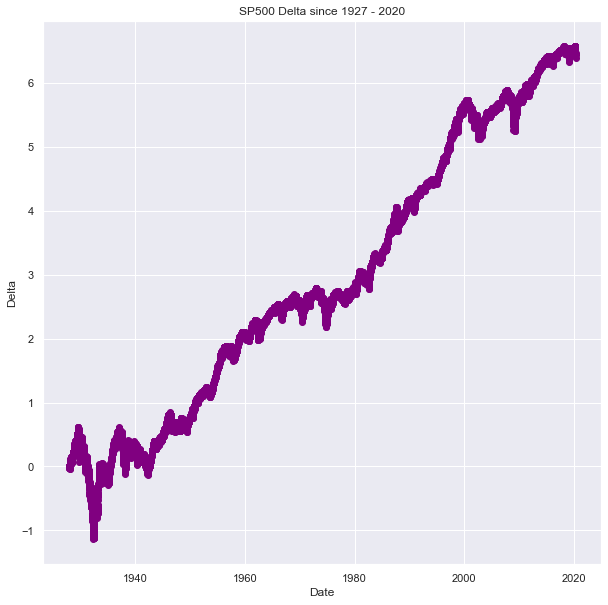

In [49]:
# Create figure and plot space
fig, ax = pyplot.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(sp500.Date.values,
        sp500['Delta%-SP500-CUM'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Delta",
       title="SP500 Delta since 1927 - 2020")


pyplot.show()

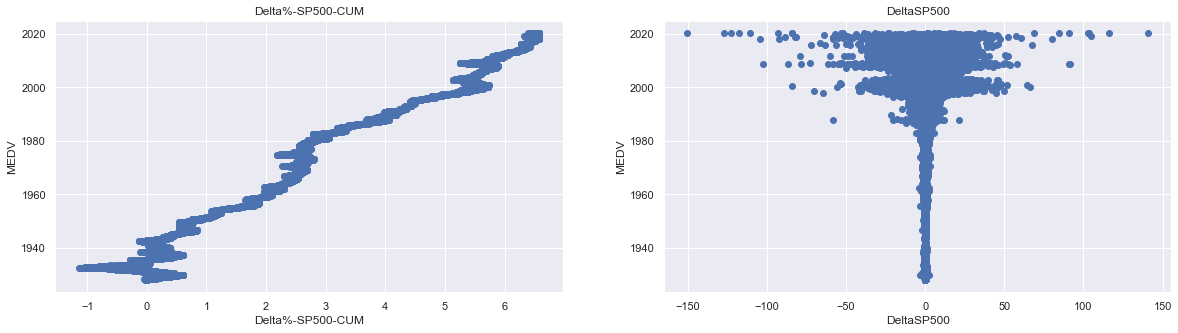

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

features = ['Delta%-SP500-CUM', 'DeltaSP500']
target = sp500['Date']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = sp500[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Slope: [0.00031233]
Intercept: -0.6743277895618203
Root mean squared error:  0.10574281614176352
R2 score:  0.9763369982653457


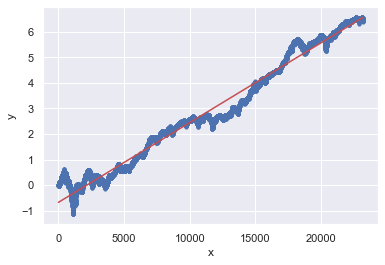

In [130]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing SP500 data set including all data 
x = np.array(sp500['Unnamed: 0']).reshape(-1, 1)
y = sp500['Delta%-SP500-CUM']

# Sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

Slope: [9.37385901e-10]
Intercept: -182.53312326682013
Root mean squared error:  0.02090247379821285
R2 score:  0.9907819621799153


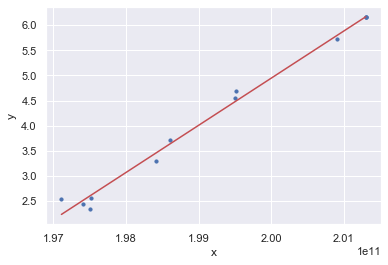

In [131]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing SP500 data set including all data 
x = np.array(df_US['eventid']).reshape(-1, 1)
y = df_US['Delta%-SP500-CUM']

    # Sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

    # Plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

Slope: [9.11161093e-10]
Intercept: -177.21221905108962
Root mean squared error:  0.03802410570666734
R2 score:  0.979266399342635


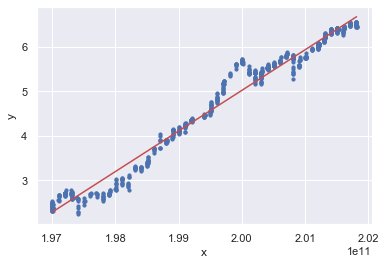

In [136]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing SP500 data set including all data 
x = np.array(df_us_casulties['eventid']).reshape(-1, 1)
y = df_us_casulties['Delta%-SP500-CUM']

    # Sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

    # Plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()